In [1]:
from functions import *

In [2]:
print("PROCESSING PSL DATA AND CONVERTING TO 2D")
X_dimensional = psl["data"]
lat_length = int(psl["lat_length"])
long_length = int(psl["long_length"])
north_atlantic_ocean_psl = psl["original"]
psl_X_dimensional = X_dimensional.rename({"month": "data", "data": "month"}).T
print("______________")
print("PROCESSING SMB DATA AND CONVERTING TO 2D")
smb_X_dimensional = laurentide_smb_mask["data"]
smb_longs = laurentide_smb["long_pos"]
smb_lats = laurentide_smb["lat_pos"]
smb_long_length = int(laurentide_smb["long_length"])
smb_lat_length = int(laurentide_smb["lat_length"])
smb_processed = laurentide_smb["original"]
print("______________")
print("PROCESSING QICE DATA AND CONVERTING TO 2D")
qice_melt_X_dimensional = laurentide_qice_melt["data"]
qice_melt_longs = laurentide_qice_melt["long_pos"]
qice_melt_lats = laurentide_qice_melt["lat_pos"]
qice_melt_long_length = int(laurentide_qice_melt["long_length"])
qice_melt_lat_length = int(laurentide_qice_melt["lat_length"])
qice_melt_processed = laurentide_qice_melt["original"]
print("______________")

PROCESSING PSL DATA AND CONVERTING TO 2D
______________
PROCESSING SMB DATA AND CONVERTING TO 2D
______________
PROCESSING QICE DATA AND CONVERTING TO 2D
______________


______________
performing SVD
standardizing
creating covariance matrix
doing svd
______________
displaying covariance percentage


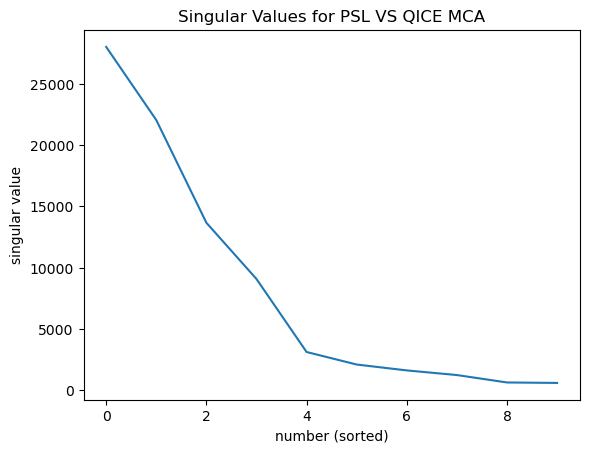

1 covariance explained: 34.07%
2 covariance explained: 26.82%
3 covariance explained: 16.63%
4 covariance explained: 11.05%
______________
graphing time series


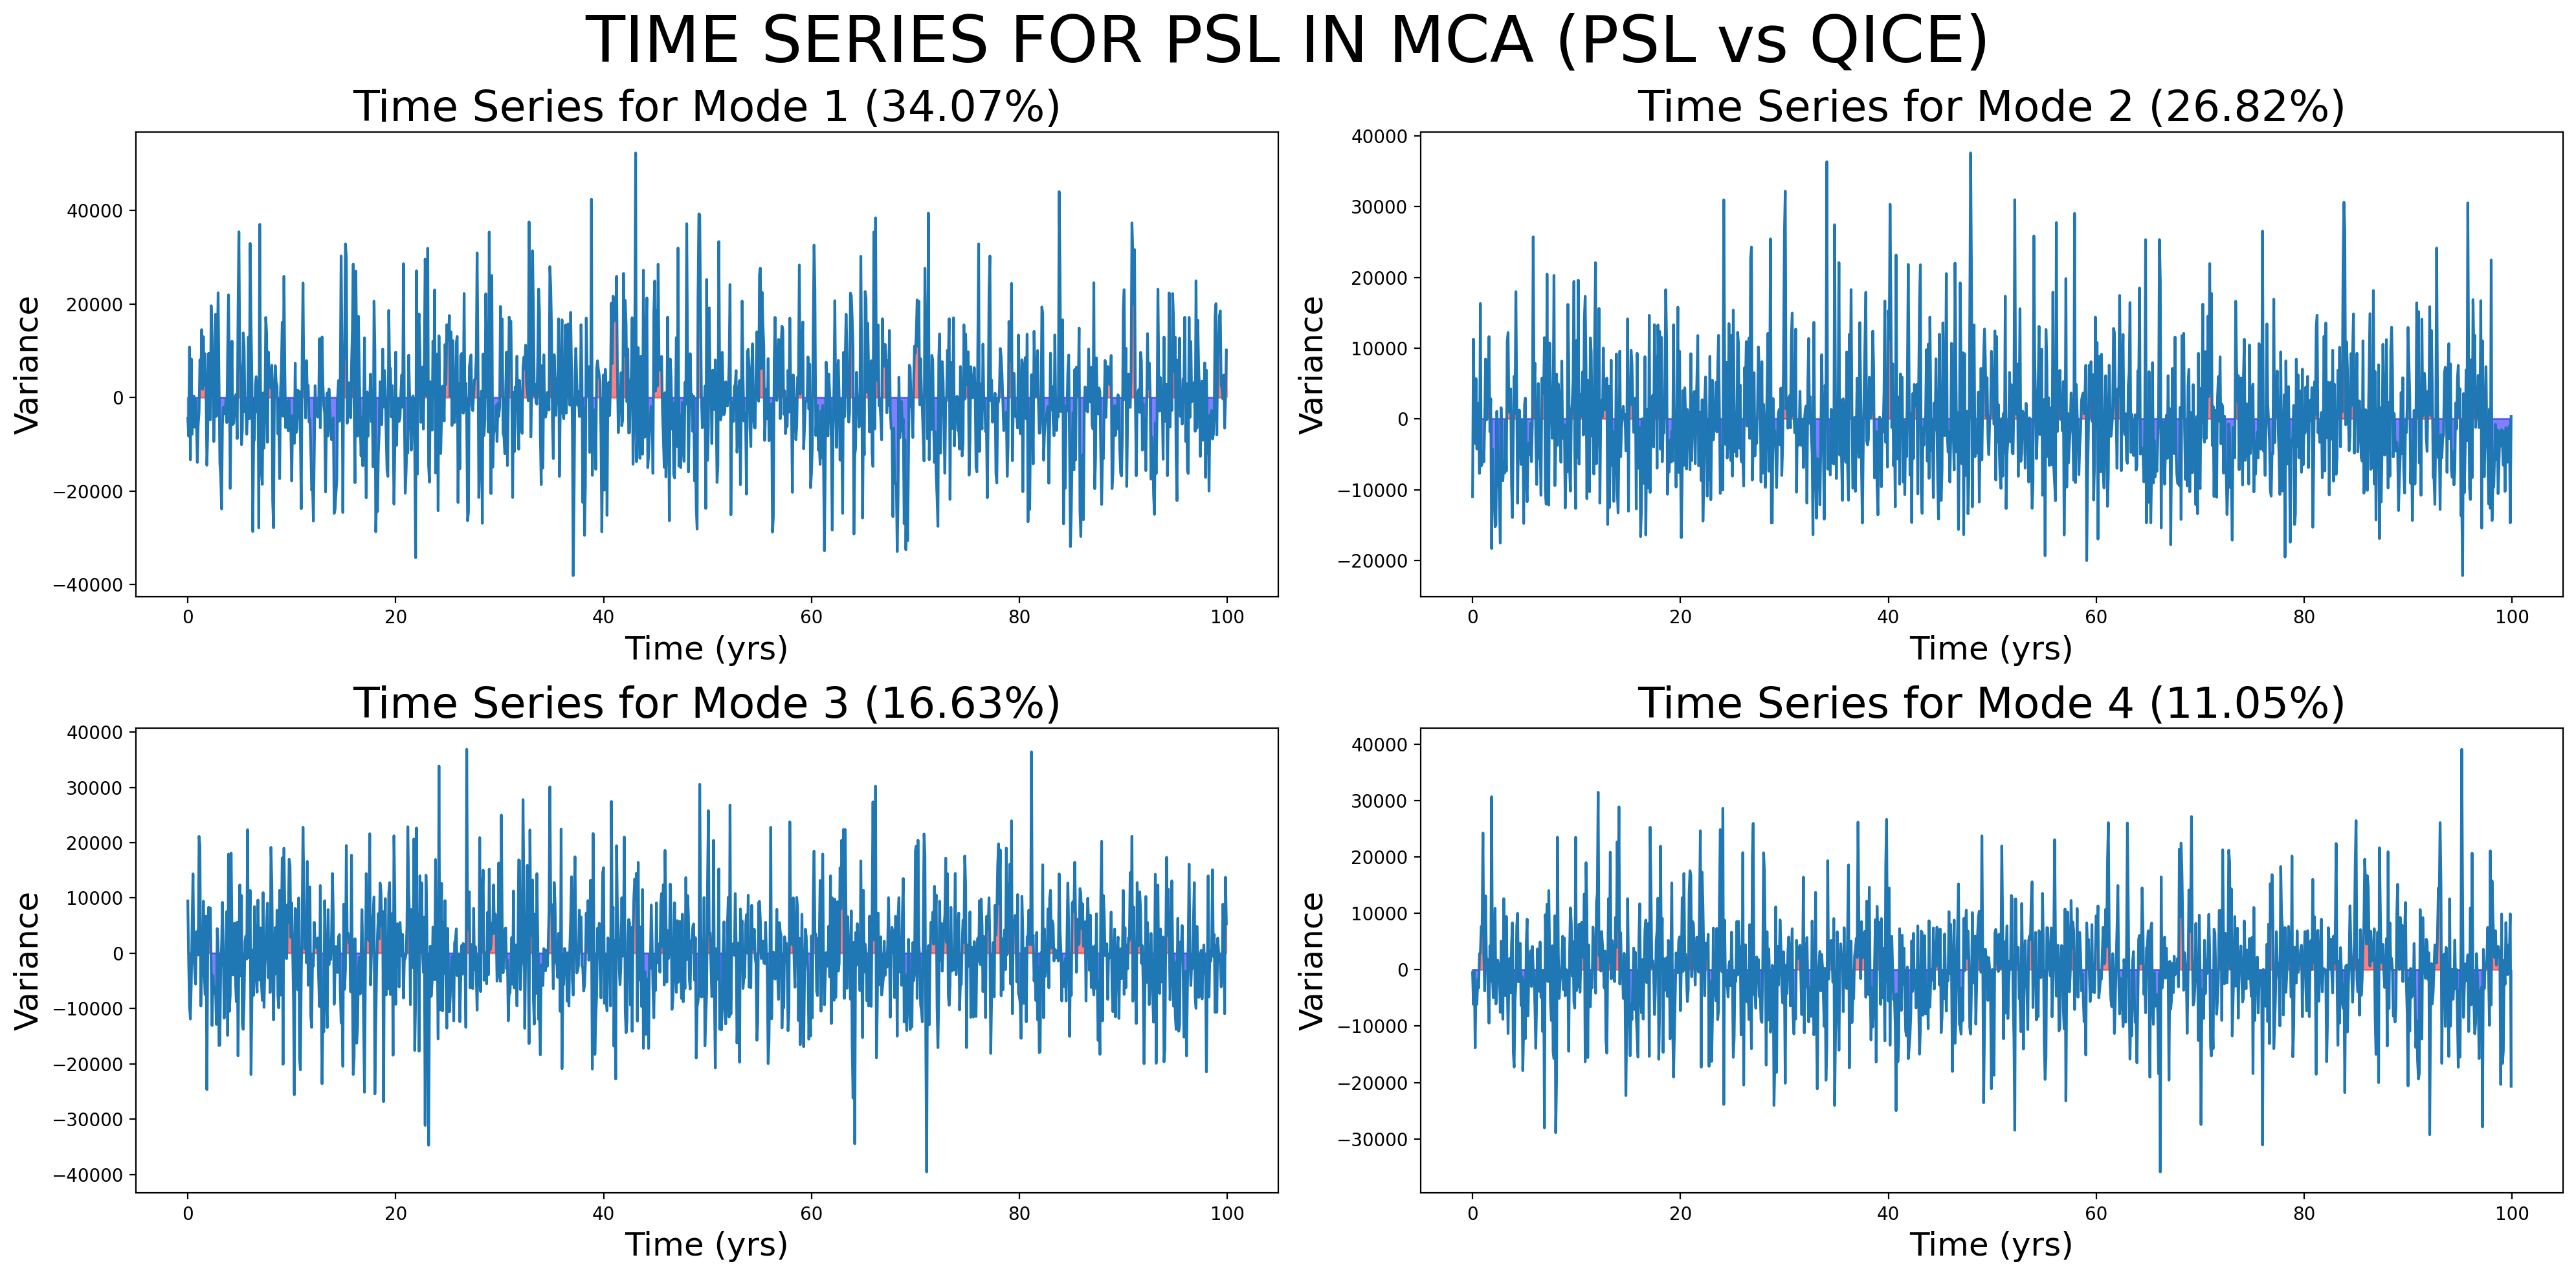

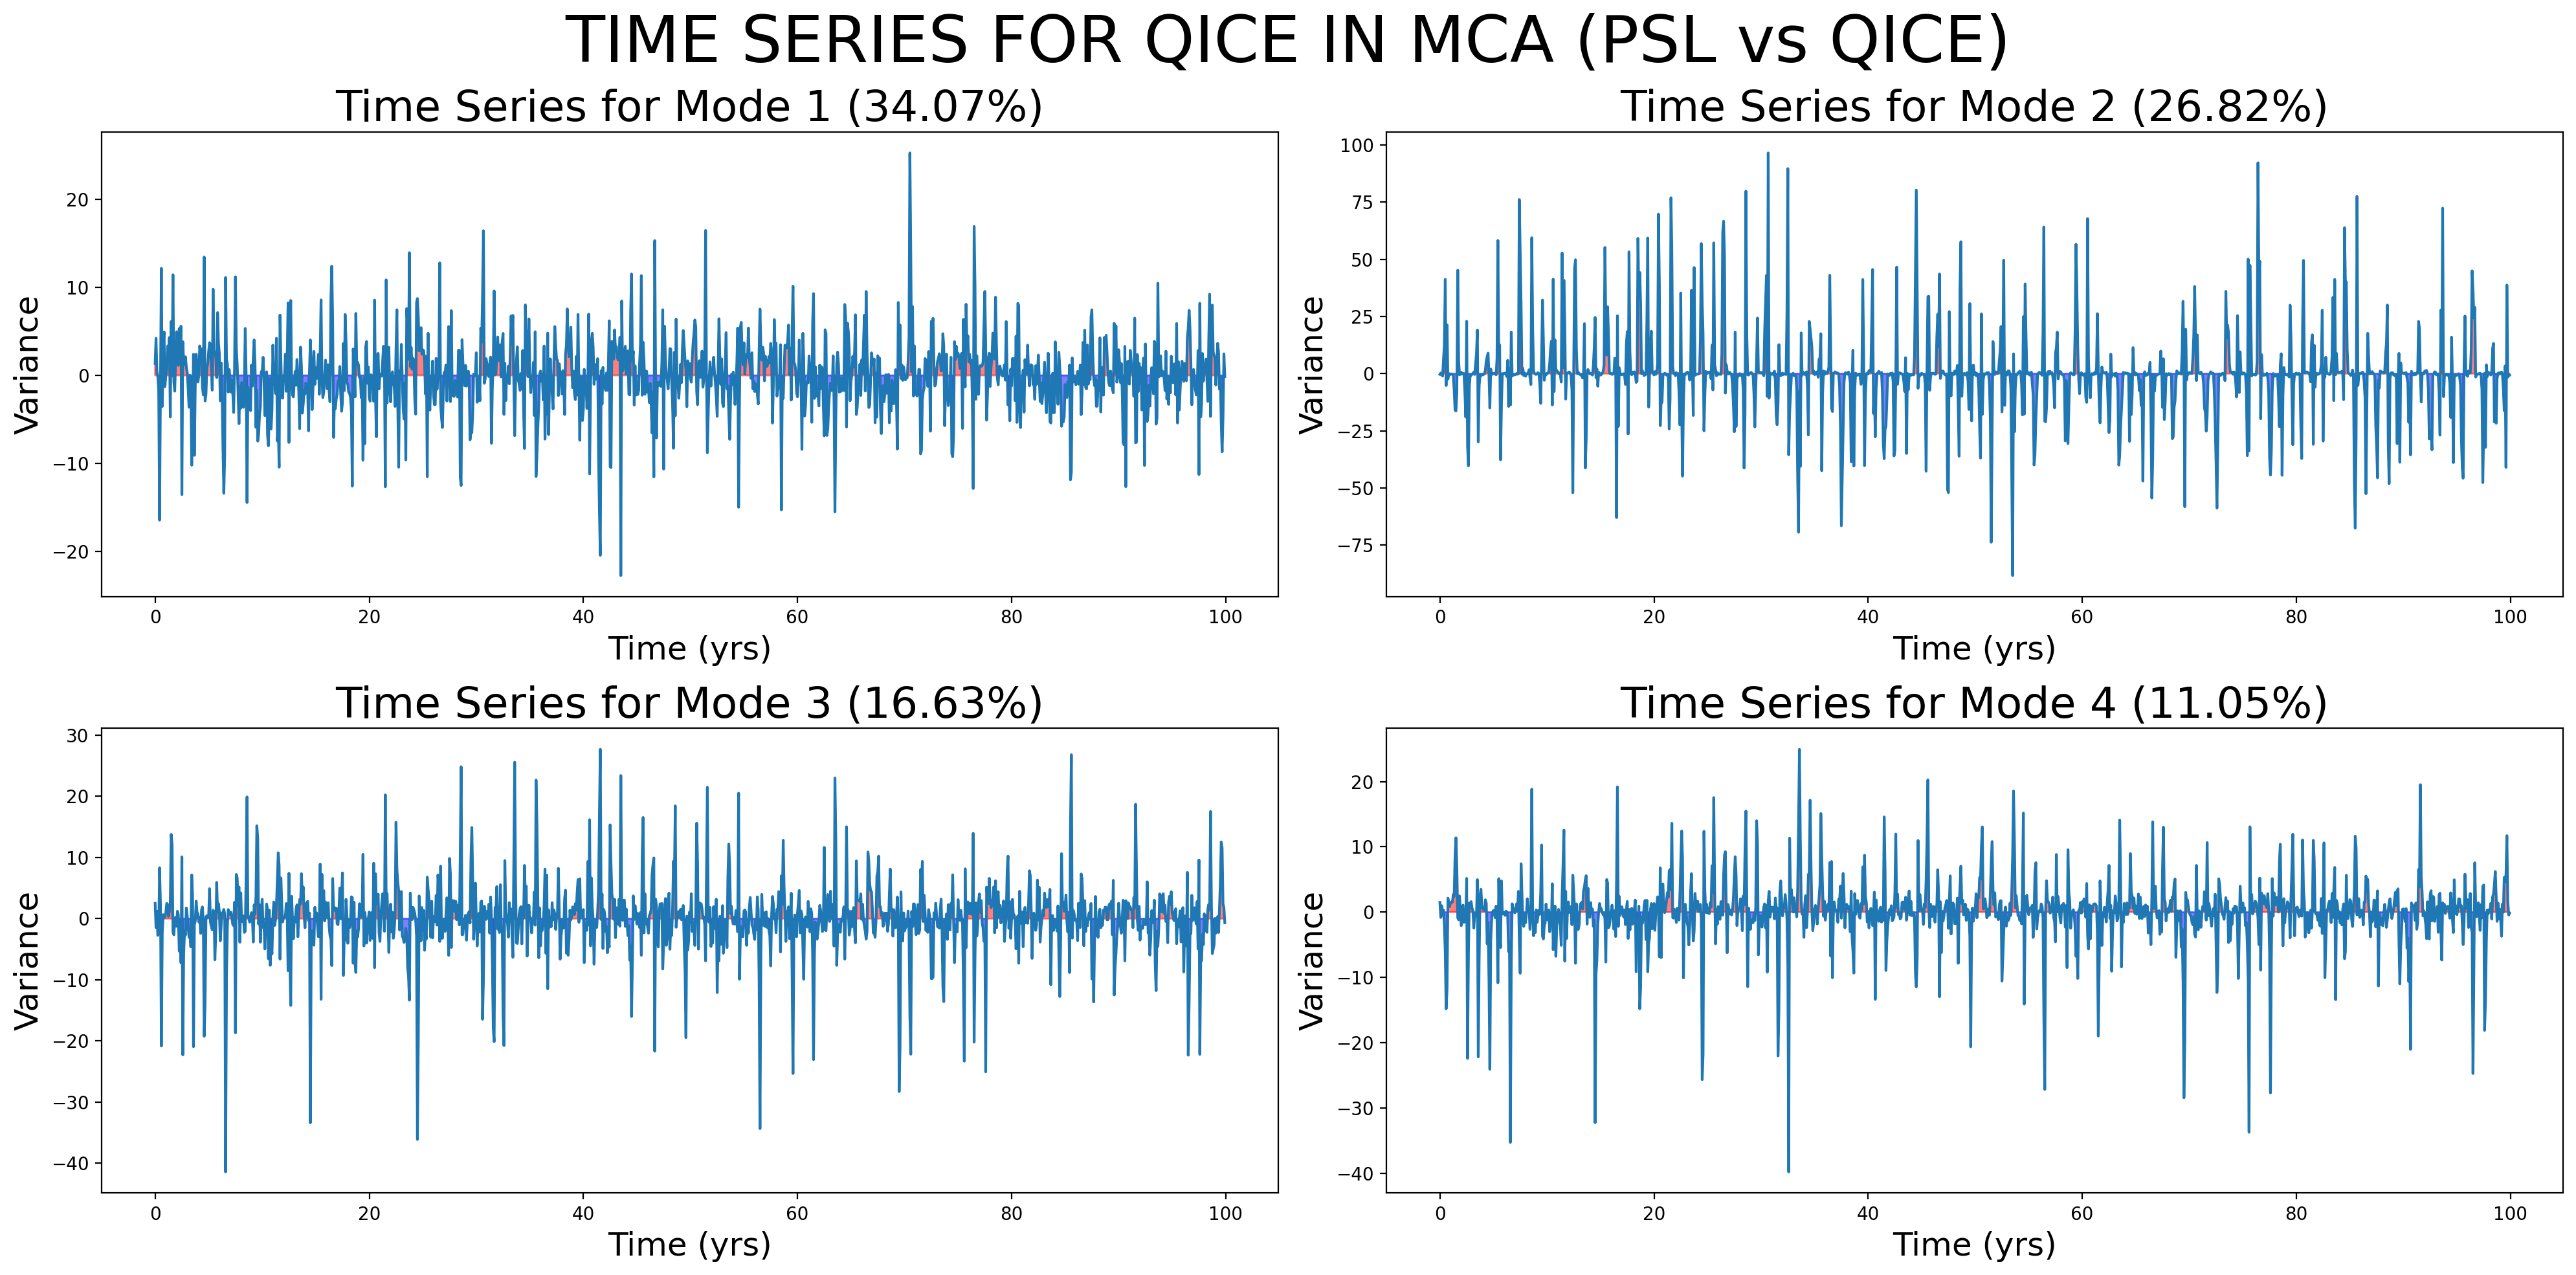

______________
reshaping to 3d
______________
graphing
understood data
made plots
plotting 0
plotting 1
plotting 2
plotting 3
accessorizing


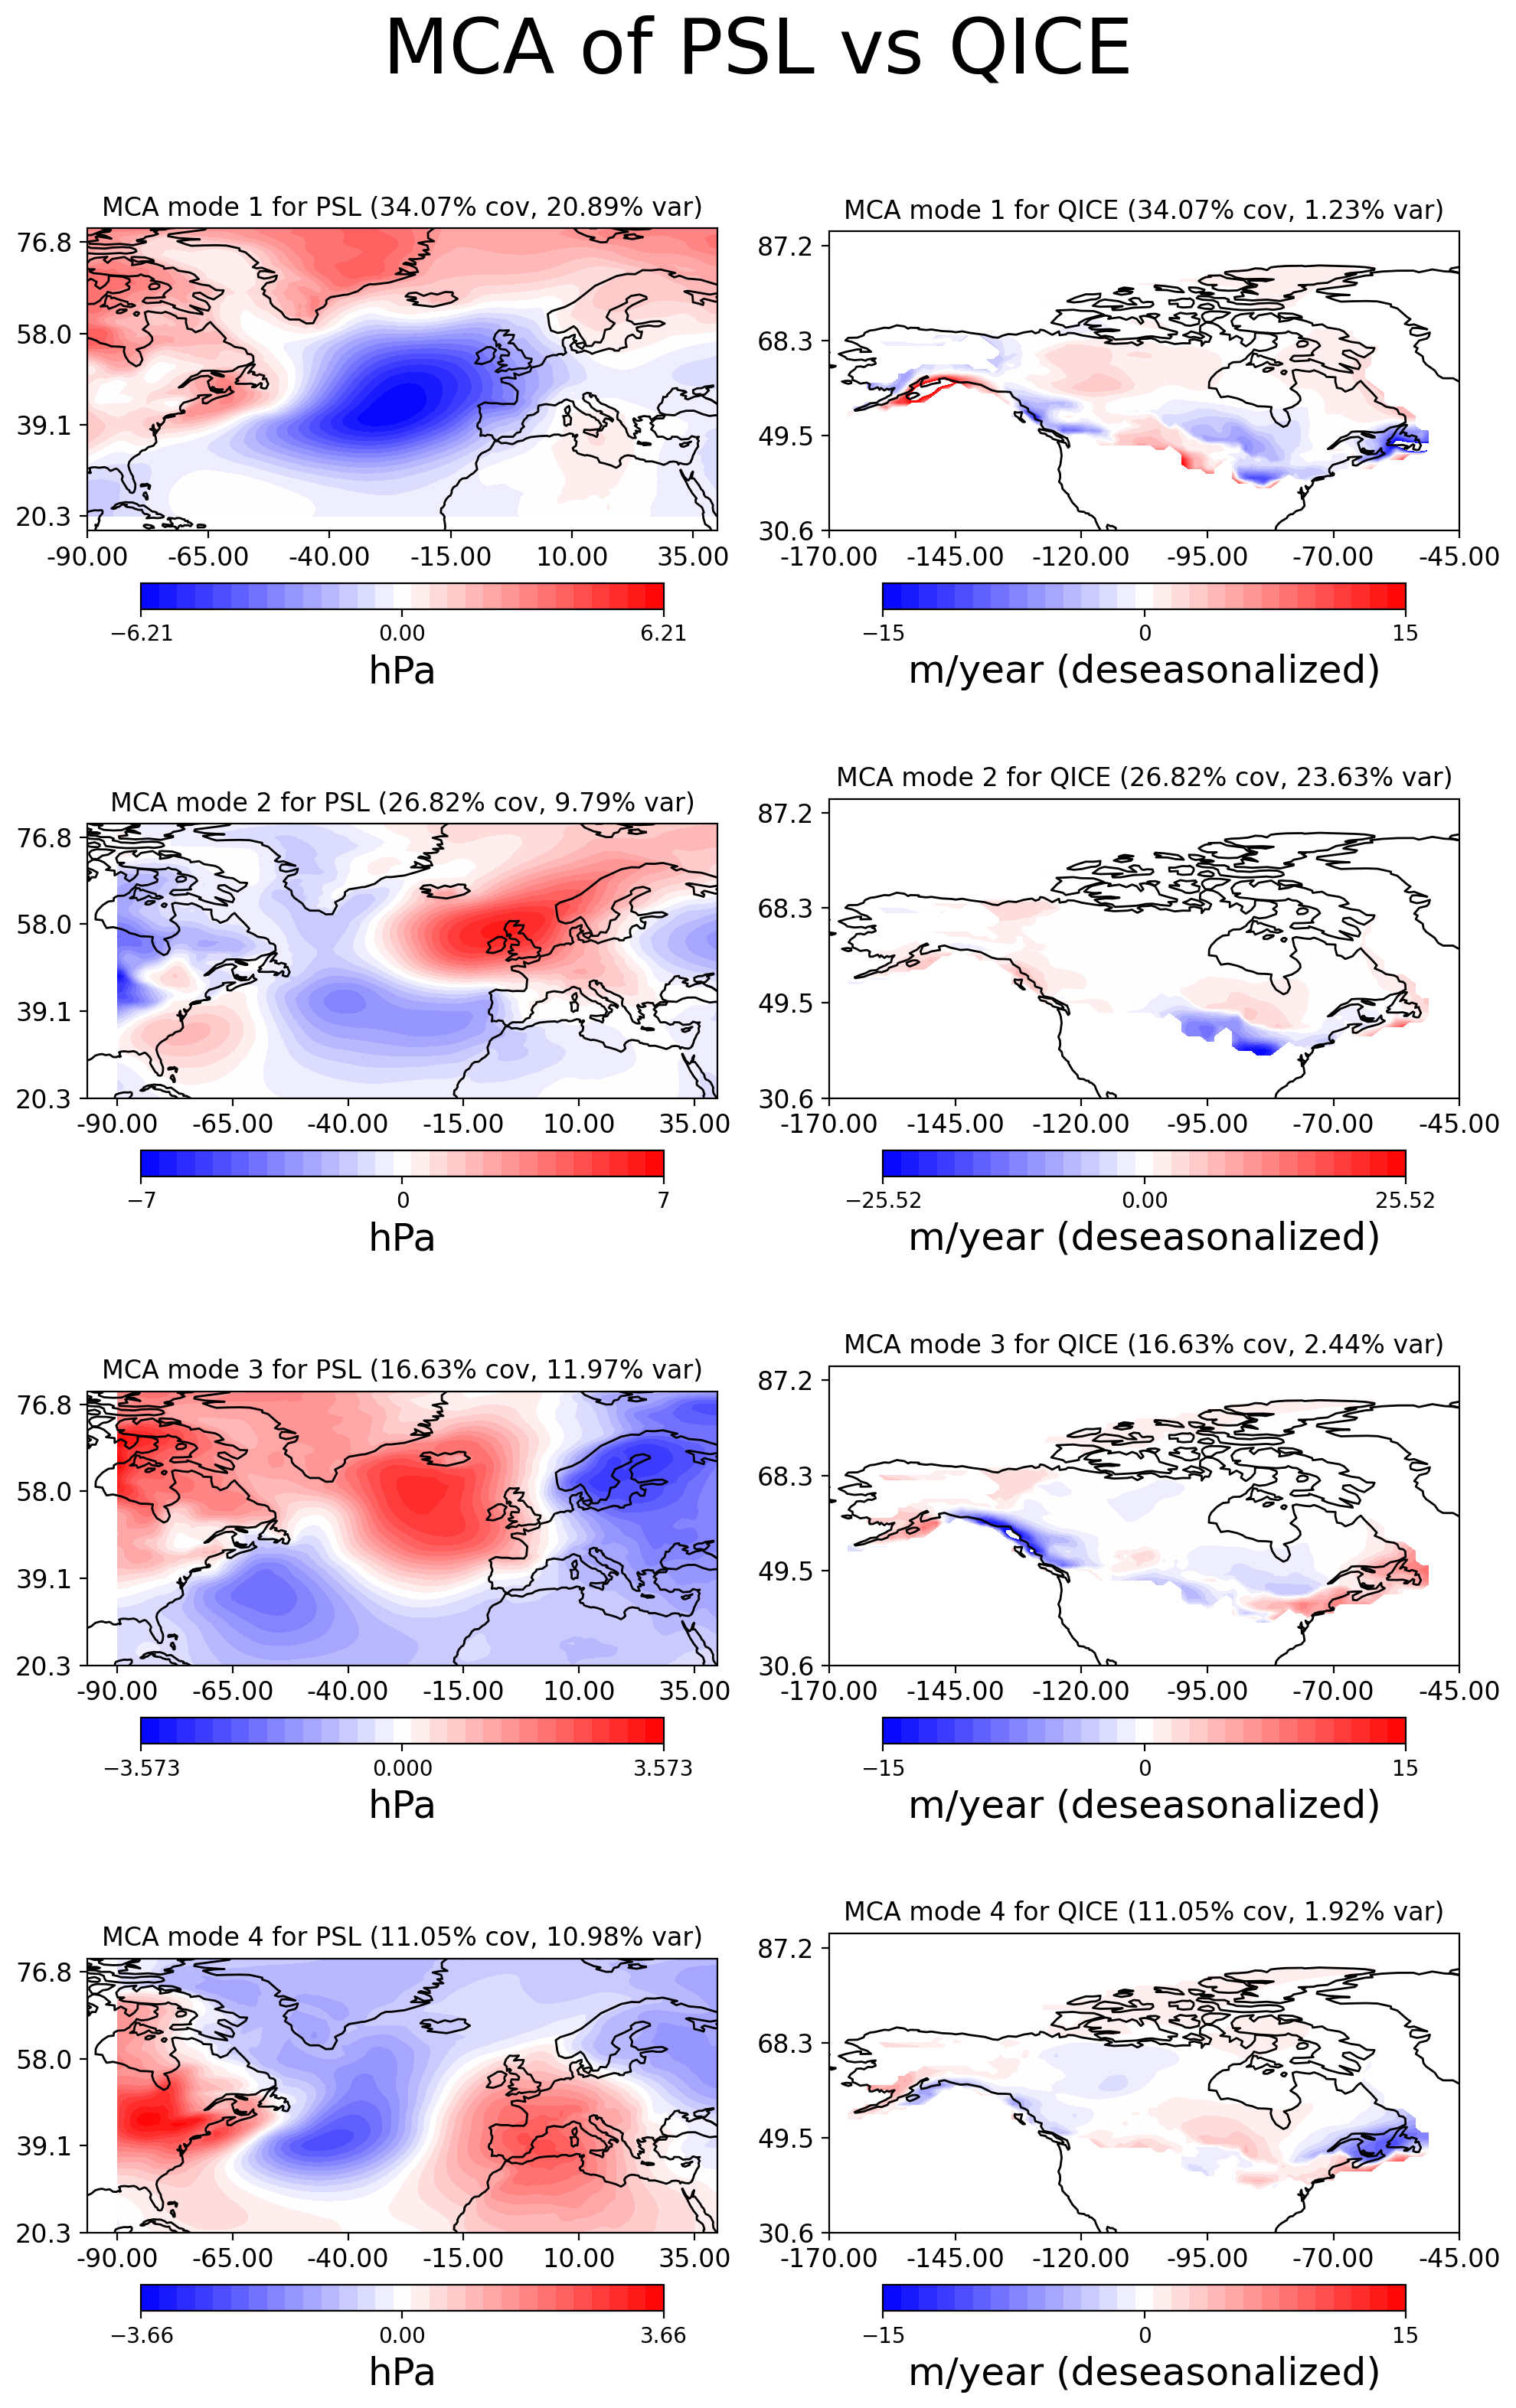

In [7]:
print("______________")
print("performing SVD")
psl_qice_U, psl_qice_S, psl_qice_V_T = svd(psl_X_dimensional, smb_X_dimensional, 10)

print("______________")
print("displaying covariance percentage")
cov_1 = plot_cov(psl_qice_S, "PSL VS QICE")
x_var, y_var = mca_variance_explained(psl_X_dimensional, smb_X_dimensional, psl_qice_U, psl_qice_V_T, 4)

print("______________")
print("graphing time series")
plot_time_series(psl_qice_U, psl_X_dimensional, 4, "TIME SERIES FOR PSL IN MCA (PSL vs QICE)", cov_1)
plot_time_series(psl_qice_V_T.T, smb_X_dimensional, 4, "TIME SERIES FOR QICE IN MCA (PSL vs QICE)", cov_1)

print("______________")
print("reshaping to 3d")
psl_U_reshaped = psl_qice_U.reshape(lat_length,long_length, 10)
smb_V_reshaped = nans_2d_to_3d(psl_qice_V_T.T, smb_long_length, smb_lat_length, smb_longs, smb_lats)

print("______________")
print("graphing")

data_mca1_1 ={
    'reshaped_mca': psl_U_reshaped,
    'original': north_atlantic_ocean_psl,
    'label': "hPa",
    'subtitle': "PSL",
    'shift': 0,
    'sigma':  psl_qice_S,
    'l_override': {}
}

data_mca1_2 ={
    'reshaped_mca': smb_V_reshaped,
    'original': smb_processed,
    'label': "m/year (deseasonalized)",
    'subtitle': "QICE",
    'shift': 360,
    'sigma': psl_qice_S,
    'l_override': {
        0:15,
        2:15,
        3:15
    }

}

plot_mca(data_mca1_1, data_mca1_2, 4, "MCA of PSL vs QICE", cov_1, x_var, y_var)

______________
performing SVD
standardizing
creating covariance matrix
doing svd
______________
displaying covariance percentage


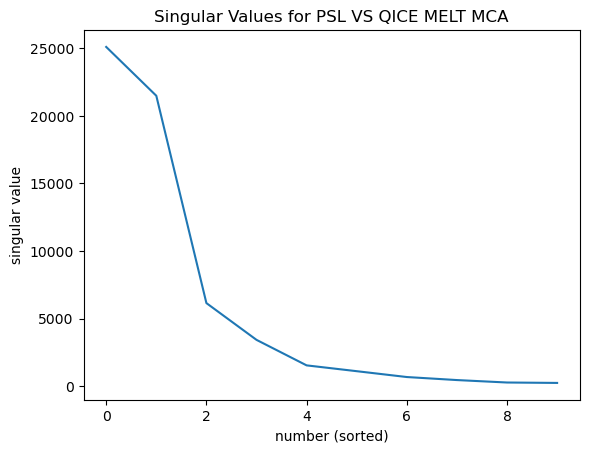

1 covariance explained: 41.51%
2 covariance explained: 35.54%
3 covariance explained: 10.17%
4 covariance explained: 5.67%
percentage var of X [0.20667867 0.10404929 0.07921115 0.06478473 0.20667867 0.10404929
 0.07921115 0.06478473 0.20667867 0.10404929 0.07921115 0.06478473
 0.20667867 0.10404929 0.07921115 0.06478473 0.20667867 0.10404929
 0.07921115 0.06478473 0.20667867 0.10404929 0.07921115 0.06478473
 0.20667867 0.10404929 0.07921115 0.06478473 0.20667867 0.10404929
 0.07921115 0.06478473 0.20667867 0.10404929 0.07921115 0.06478473
 0.20667867 0.10404929 0.07921115 0.06478473 0.20667867 0.10404929
 0.07921115 0.06478473 0.20667867 0.10404929 0.07921115 0.06478473
 0.20667867 0.10404929 0.07921115 0.06478473 0.20667867 0.10404929
 0.07921115 0.06478473 0.20667867 0.10404929 0.07921115 0.06478473
 0.20667867 0.10404929 0.07921115 0.06478473 0.20667867 0.10404929
 0.07921115 0.06478473 0.20667867 0.10404929 0.07921115 0.06478473
 0.20667867 0.10404929 0.07921115 0.06478473 0.206678

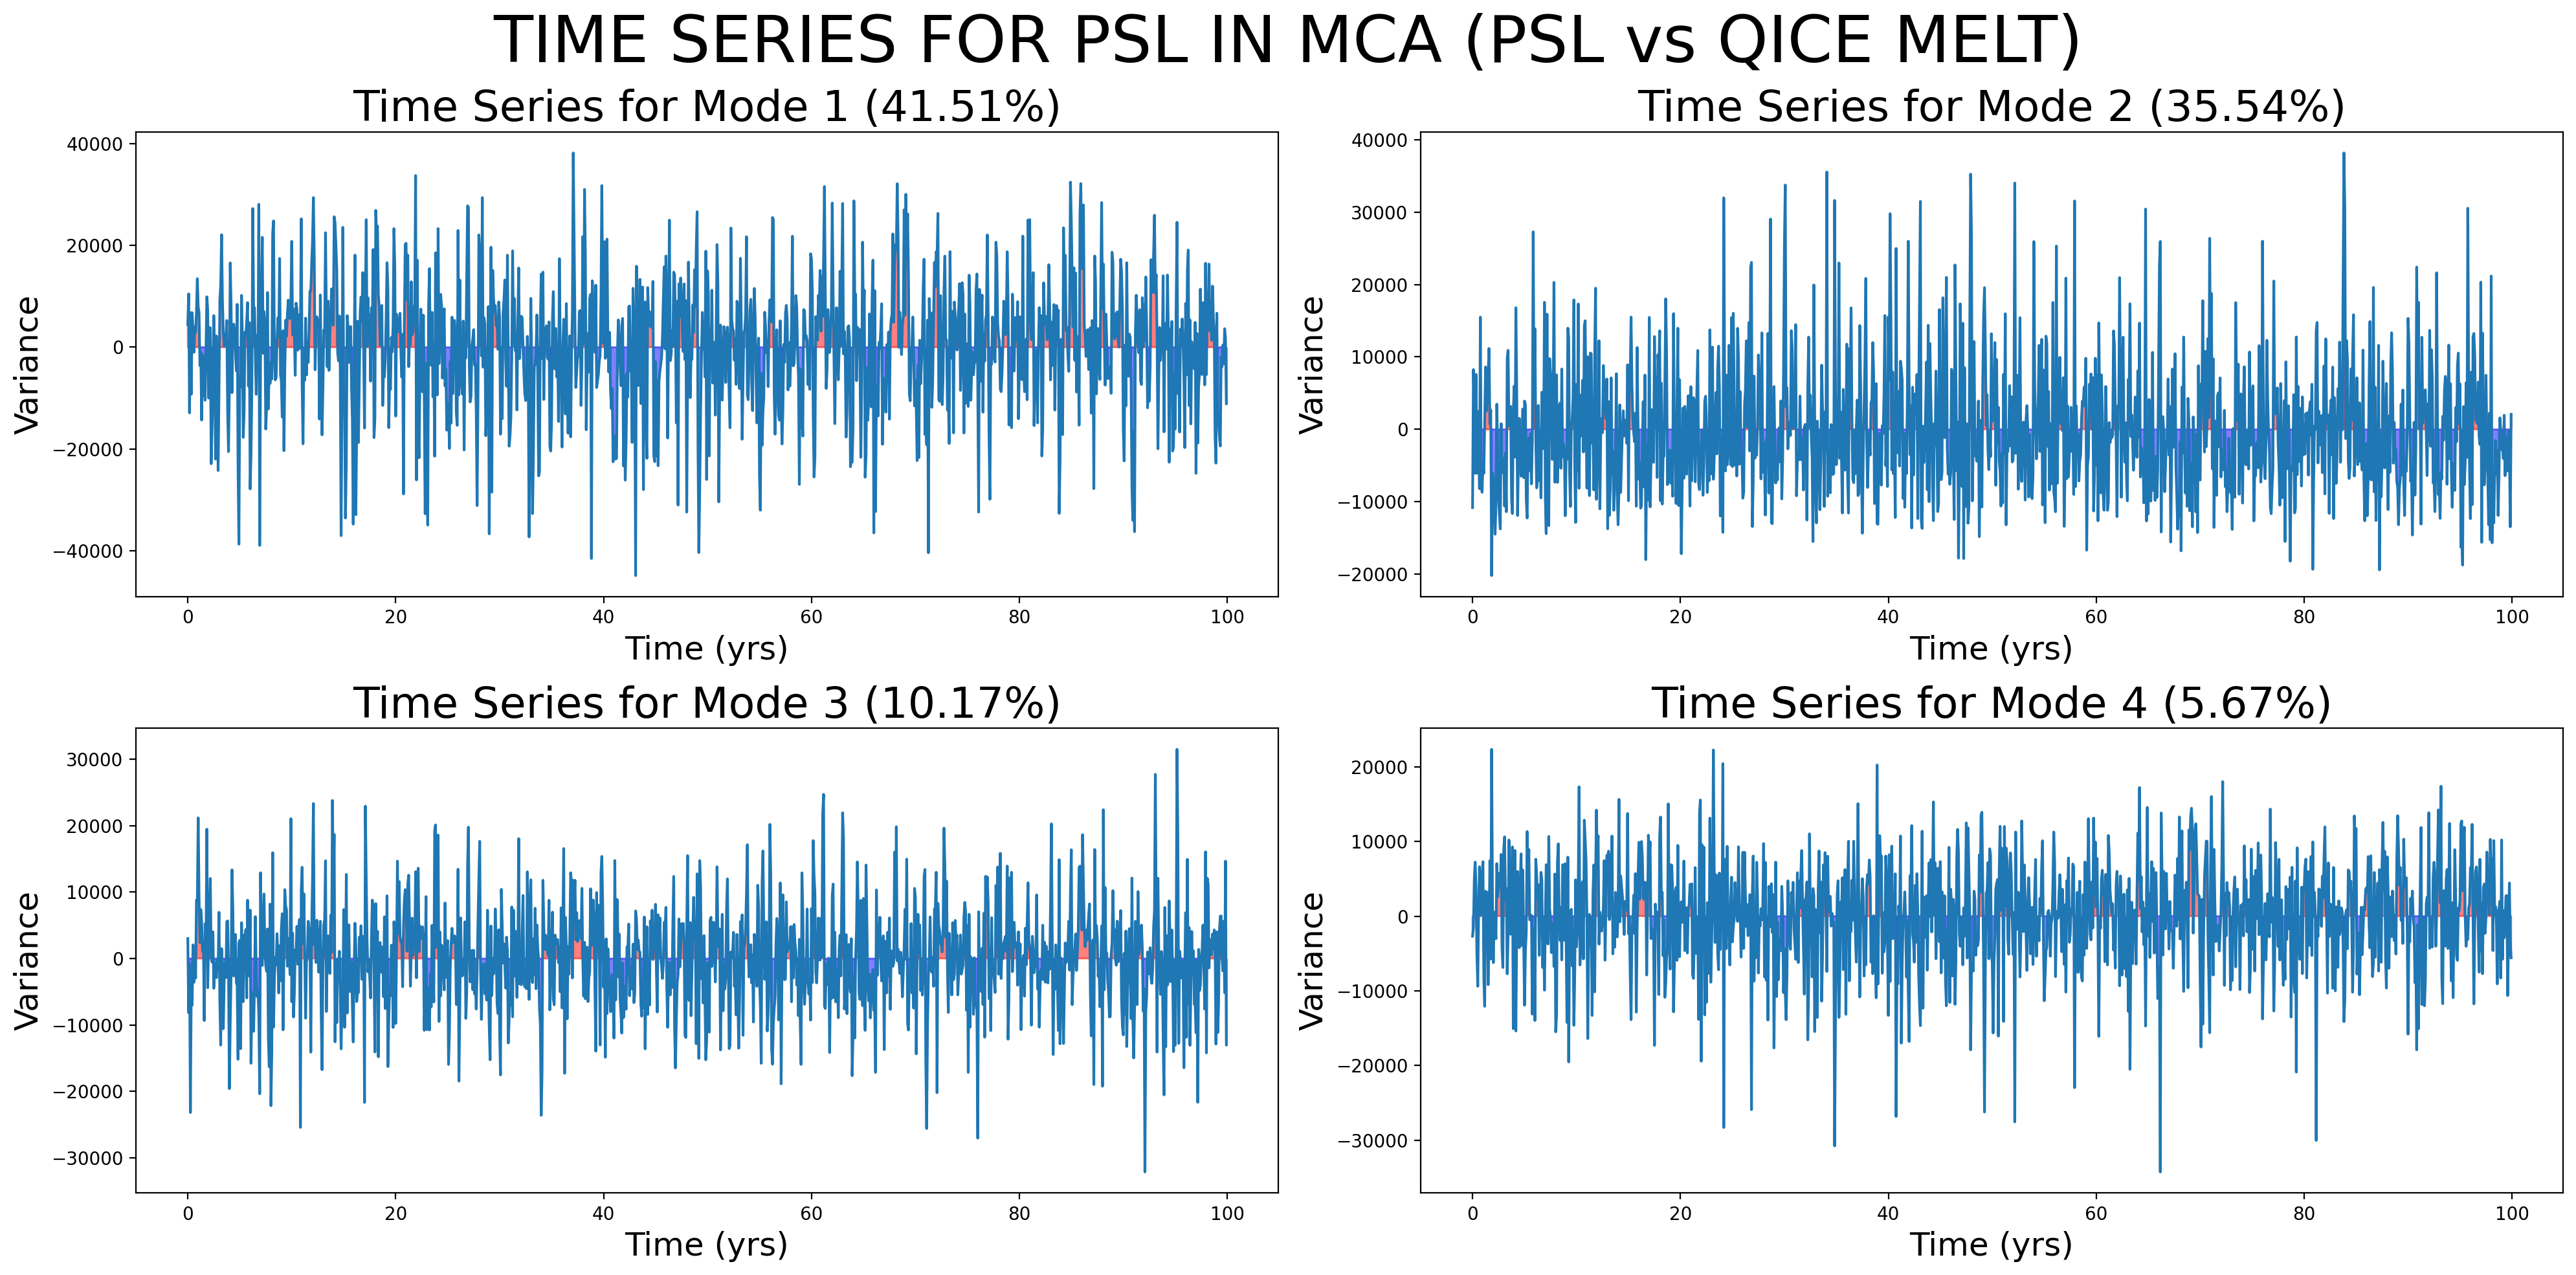

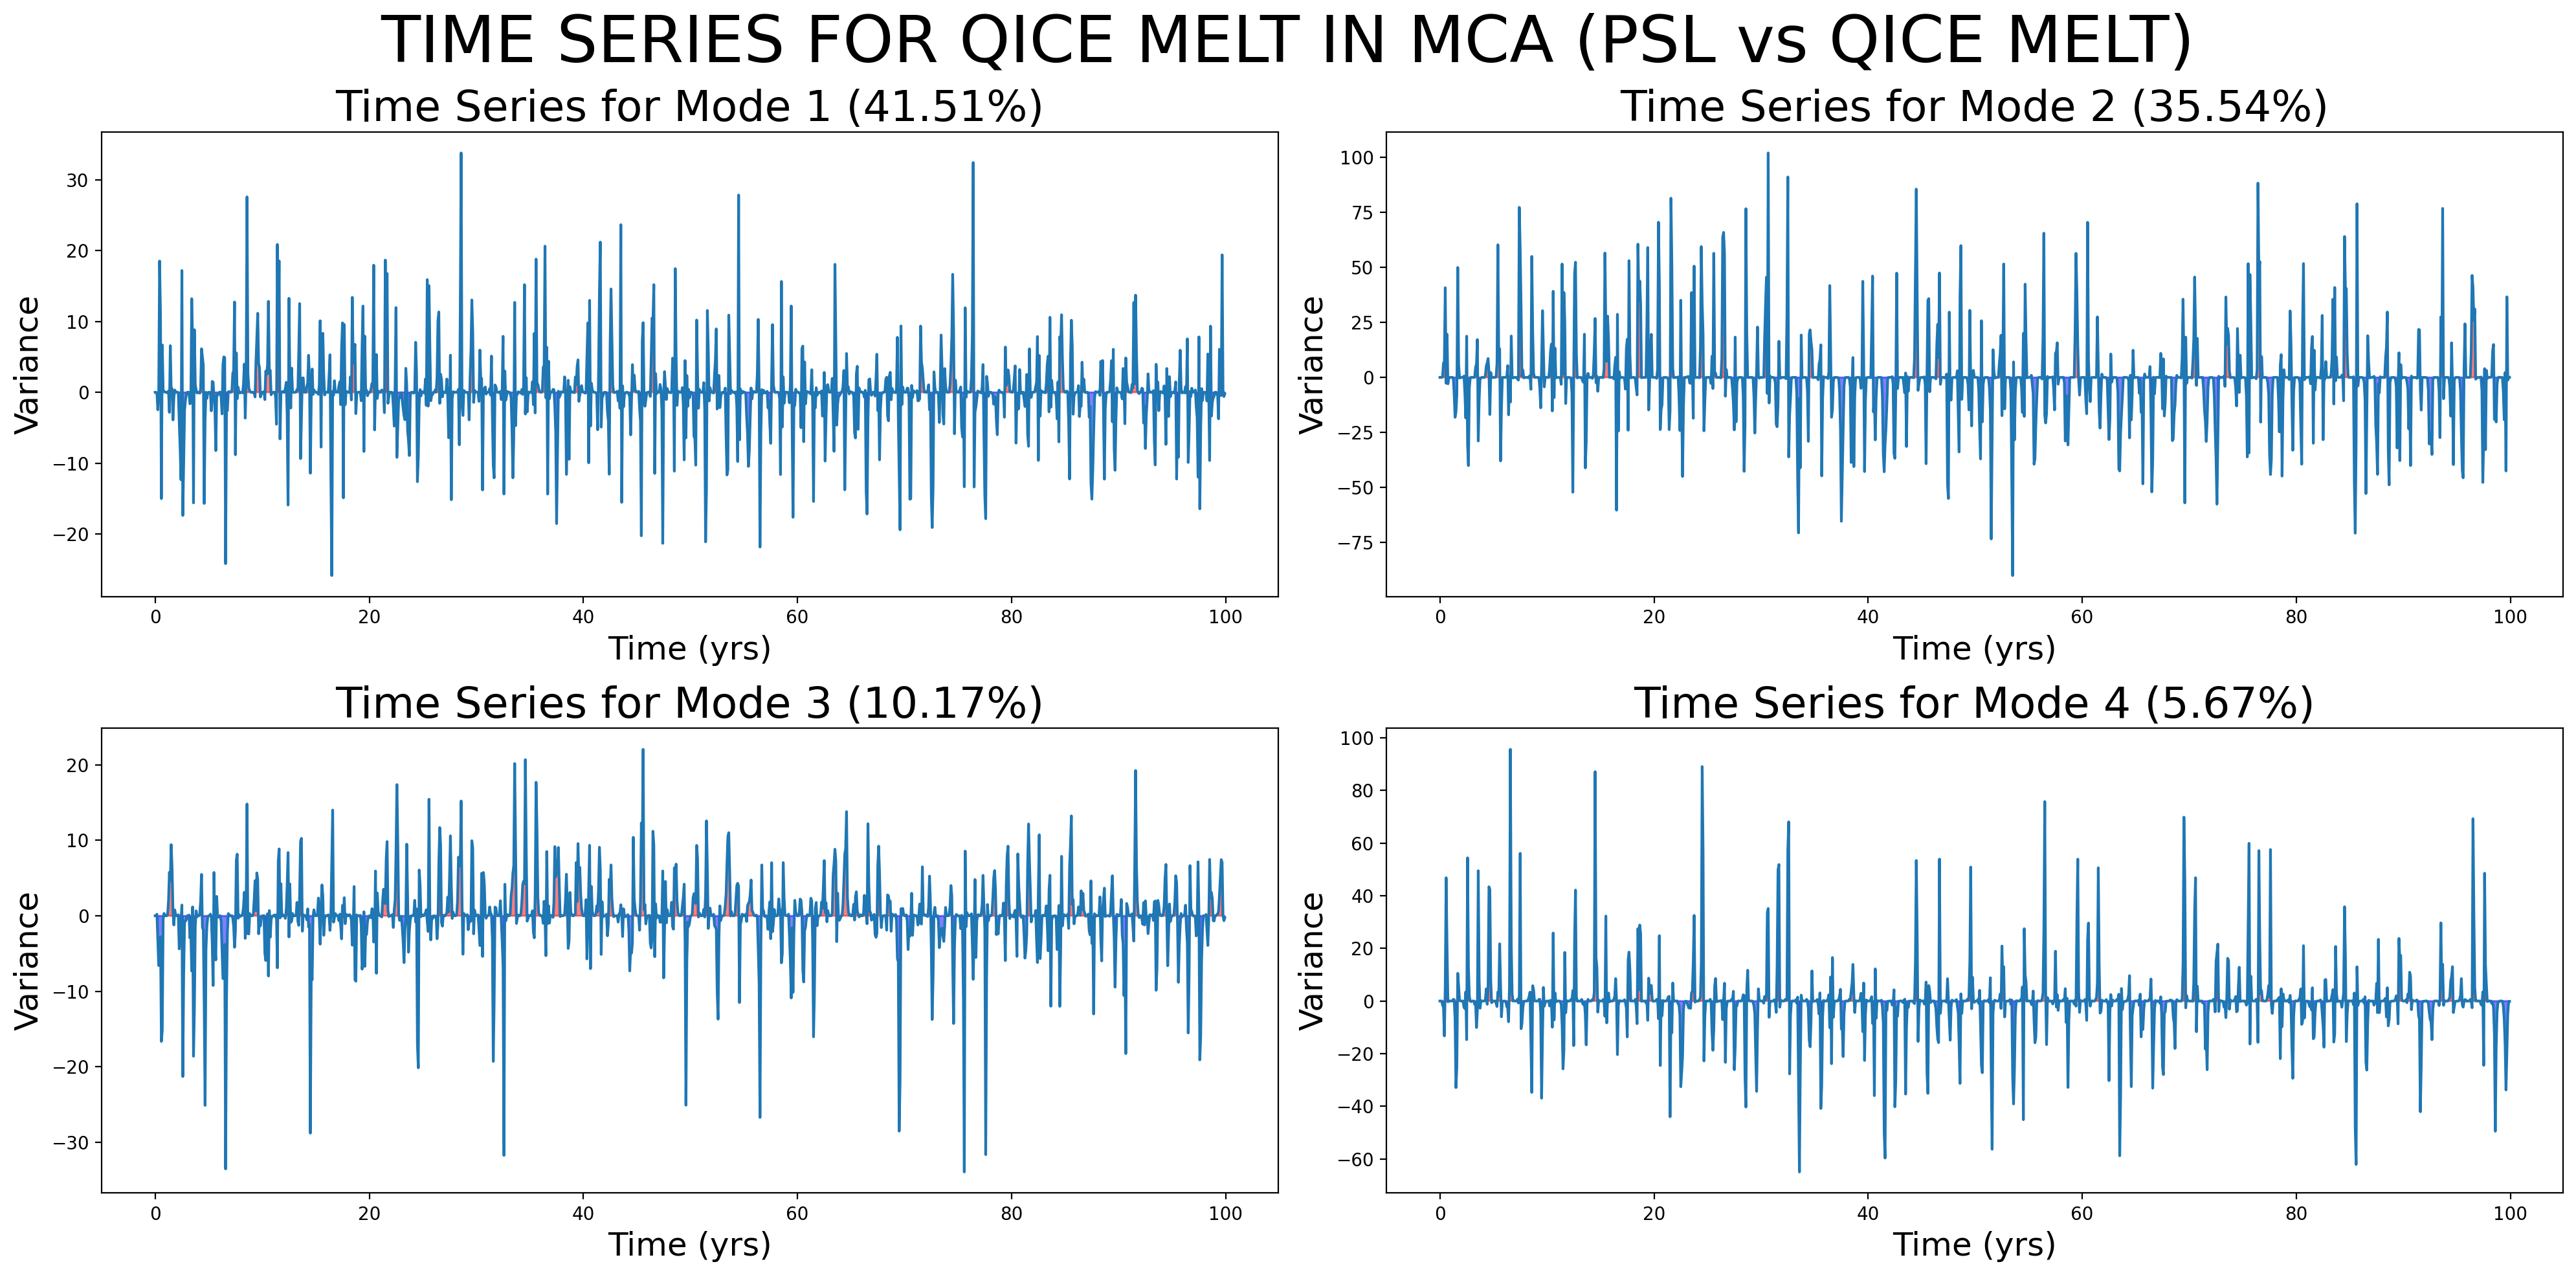

______________
reshaping
______________
graphing
understood data
made plots
plotting 0
plotting 1
plotting 2
plotting 3
accessorizing


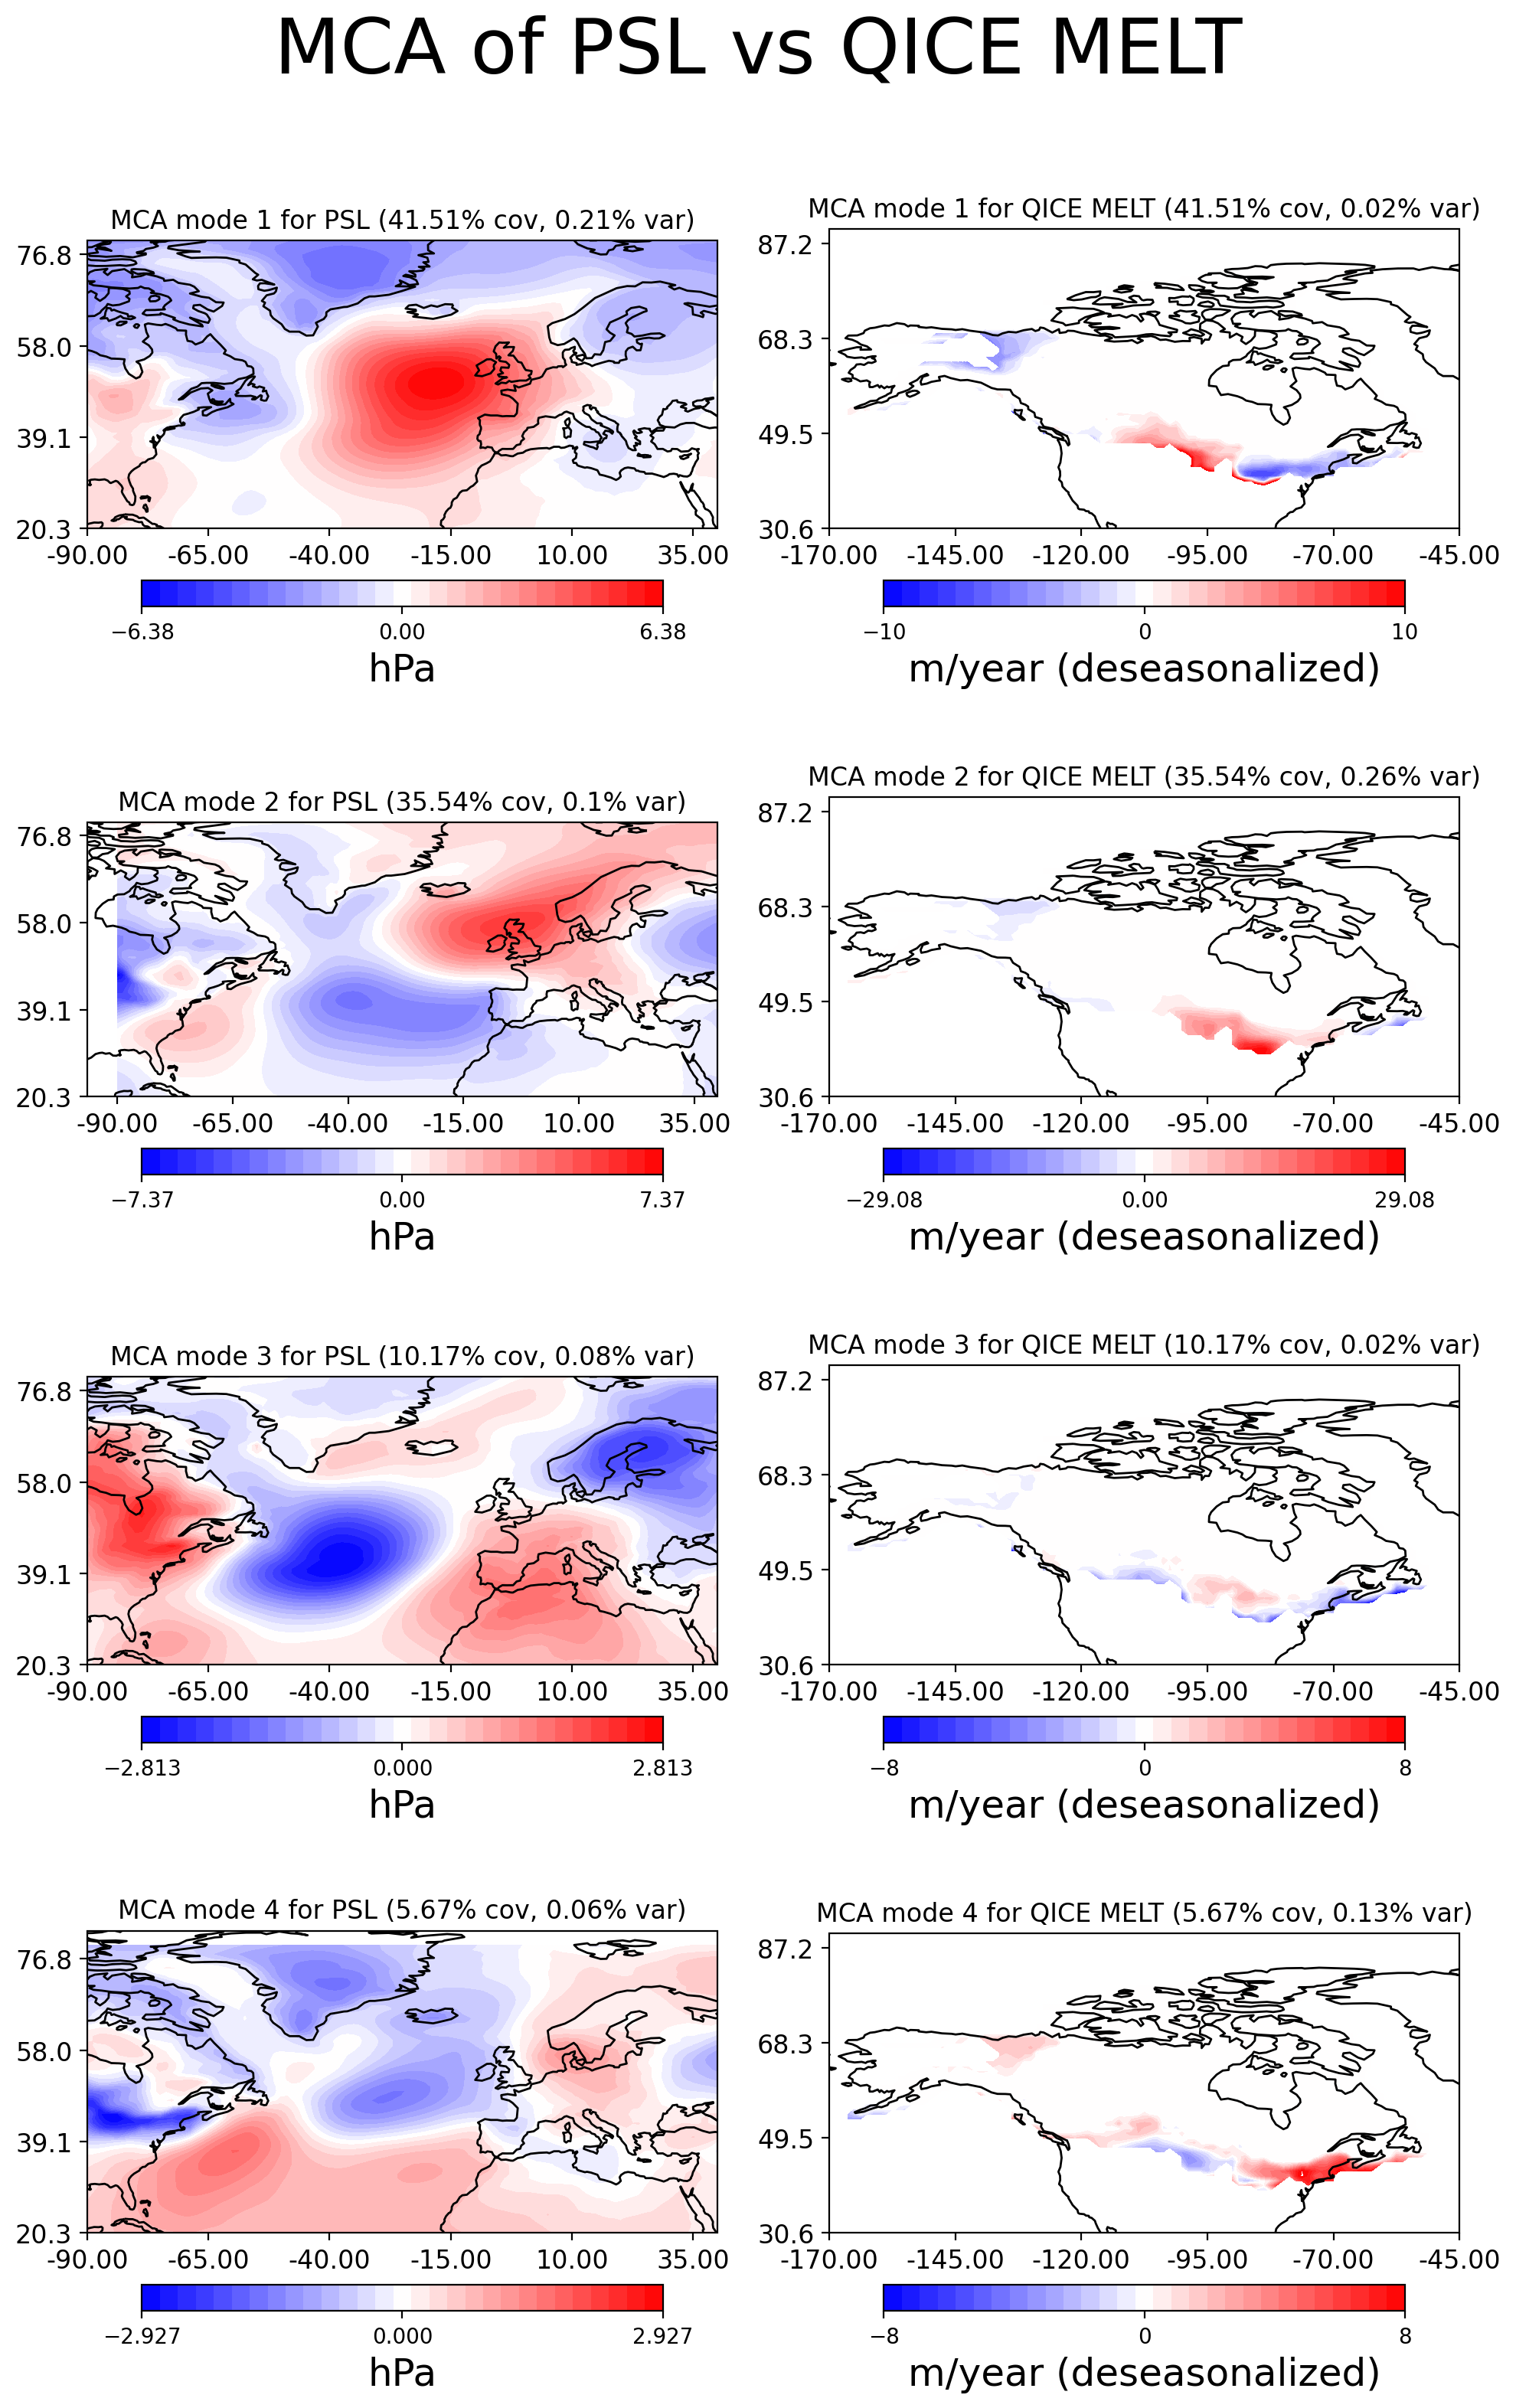

In [4]:
print("______________")
print("performing SVD")
psl_melt_U, psl_melt_S, psl_melt_V_T = svd(psl_X_dimensional, qice_melt_X_dimensional, 10)

print("______________")
print("displaying covariance percentage")
cov_2 =  plot_cov(psl_melt_S, "PSL VS QICE MELT")
x_var_2, y_var_2 = mca_variance_explained(psl_X_dimensional, qice_melt_X_dimensional, psl_melt_U, psl_melt_V_T, 4)


print("______________")
print("graphing time series")
plot_time_series(psl_melt_U, psl_X_dimensional, 4, "TIME SERIES FOR PSL IN MCA (PSL vs QICE MELT)", cov_2)
plot_time_series(psl_melt_V_T.T, qice_melt_X_dimensional, 4, "TIME SERIES FOR QICE MELT IN MCA (PSL vs QICE MELT)", cov_2)

print("______________")
print("reshaping")
psl_melt_U_reshaped = psl_melt_U.reshape(lat_length,long_length, 10)
qice_melt_V_reshaped = nans_2d_to_3d(psl_melt_V_T.T, qice_melt_long_length, qice_melt_lat_length,  qice_melt_longs, qice_melt_lats)

print("______________")
print("graphing")

data_mca2_1 ={
    'reshaped_mca': psl_melt_U_reshaped,
    'original': north_atlantic_ocean_psl,
    'label': "hPa",
    'subtitle': "PSL",
    'shift': 0,
    'sigma':  psl_melt_S,
    'l_override': {}

}

data_mca2_2 ={
    'reshaped_mca': qice_melt_V_reshaped,
    'original': qice_melt_processed,
    'label': "m/year (deseasonalized)",
    'subtitle': "QICE MELT",
    'shift': 360,
    'sigma': psl_melt_S,
    'l_override': {
        0:10,
        2:8,
        3:8
        }
}

plot_mca(data_mca2_1, data_mca2_2, 4, "MCA of PSL vs QICE MELT", cov_2, x_var_2, y_var_2 )
